In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Schema**

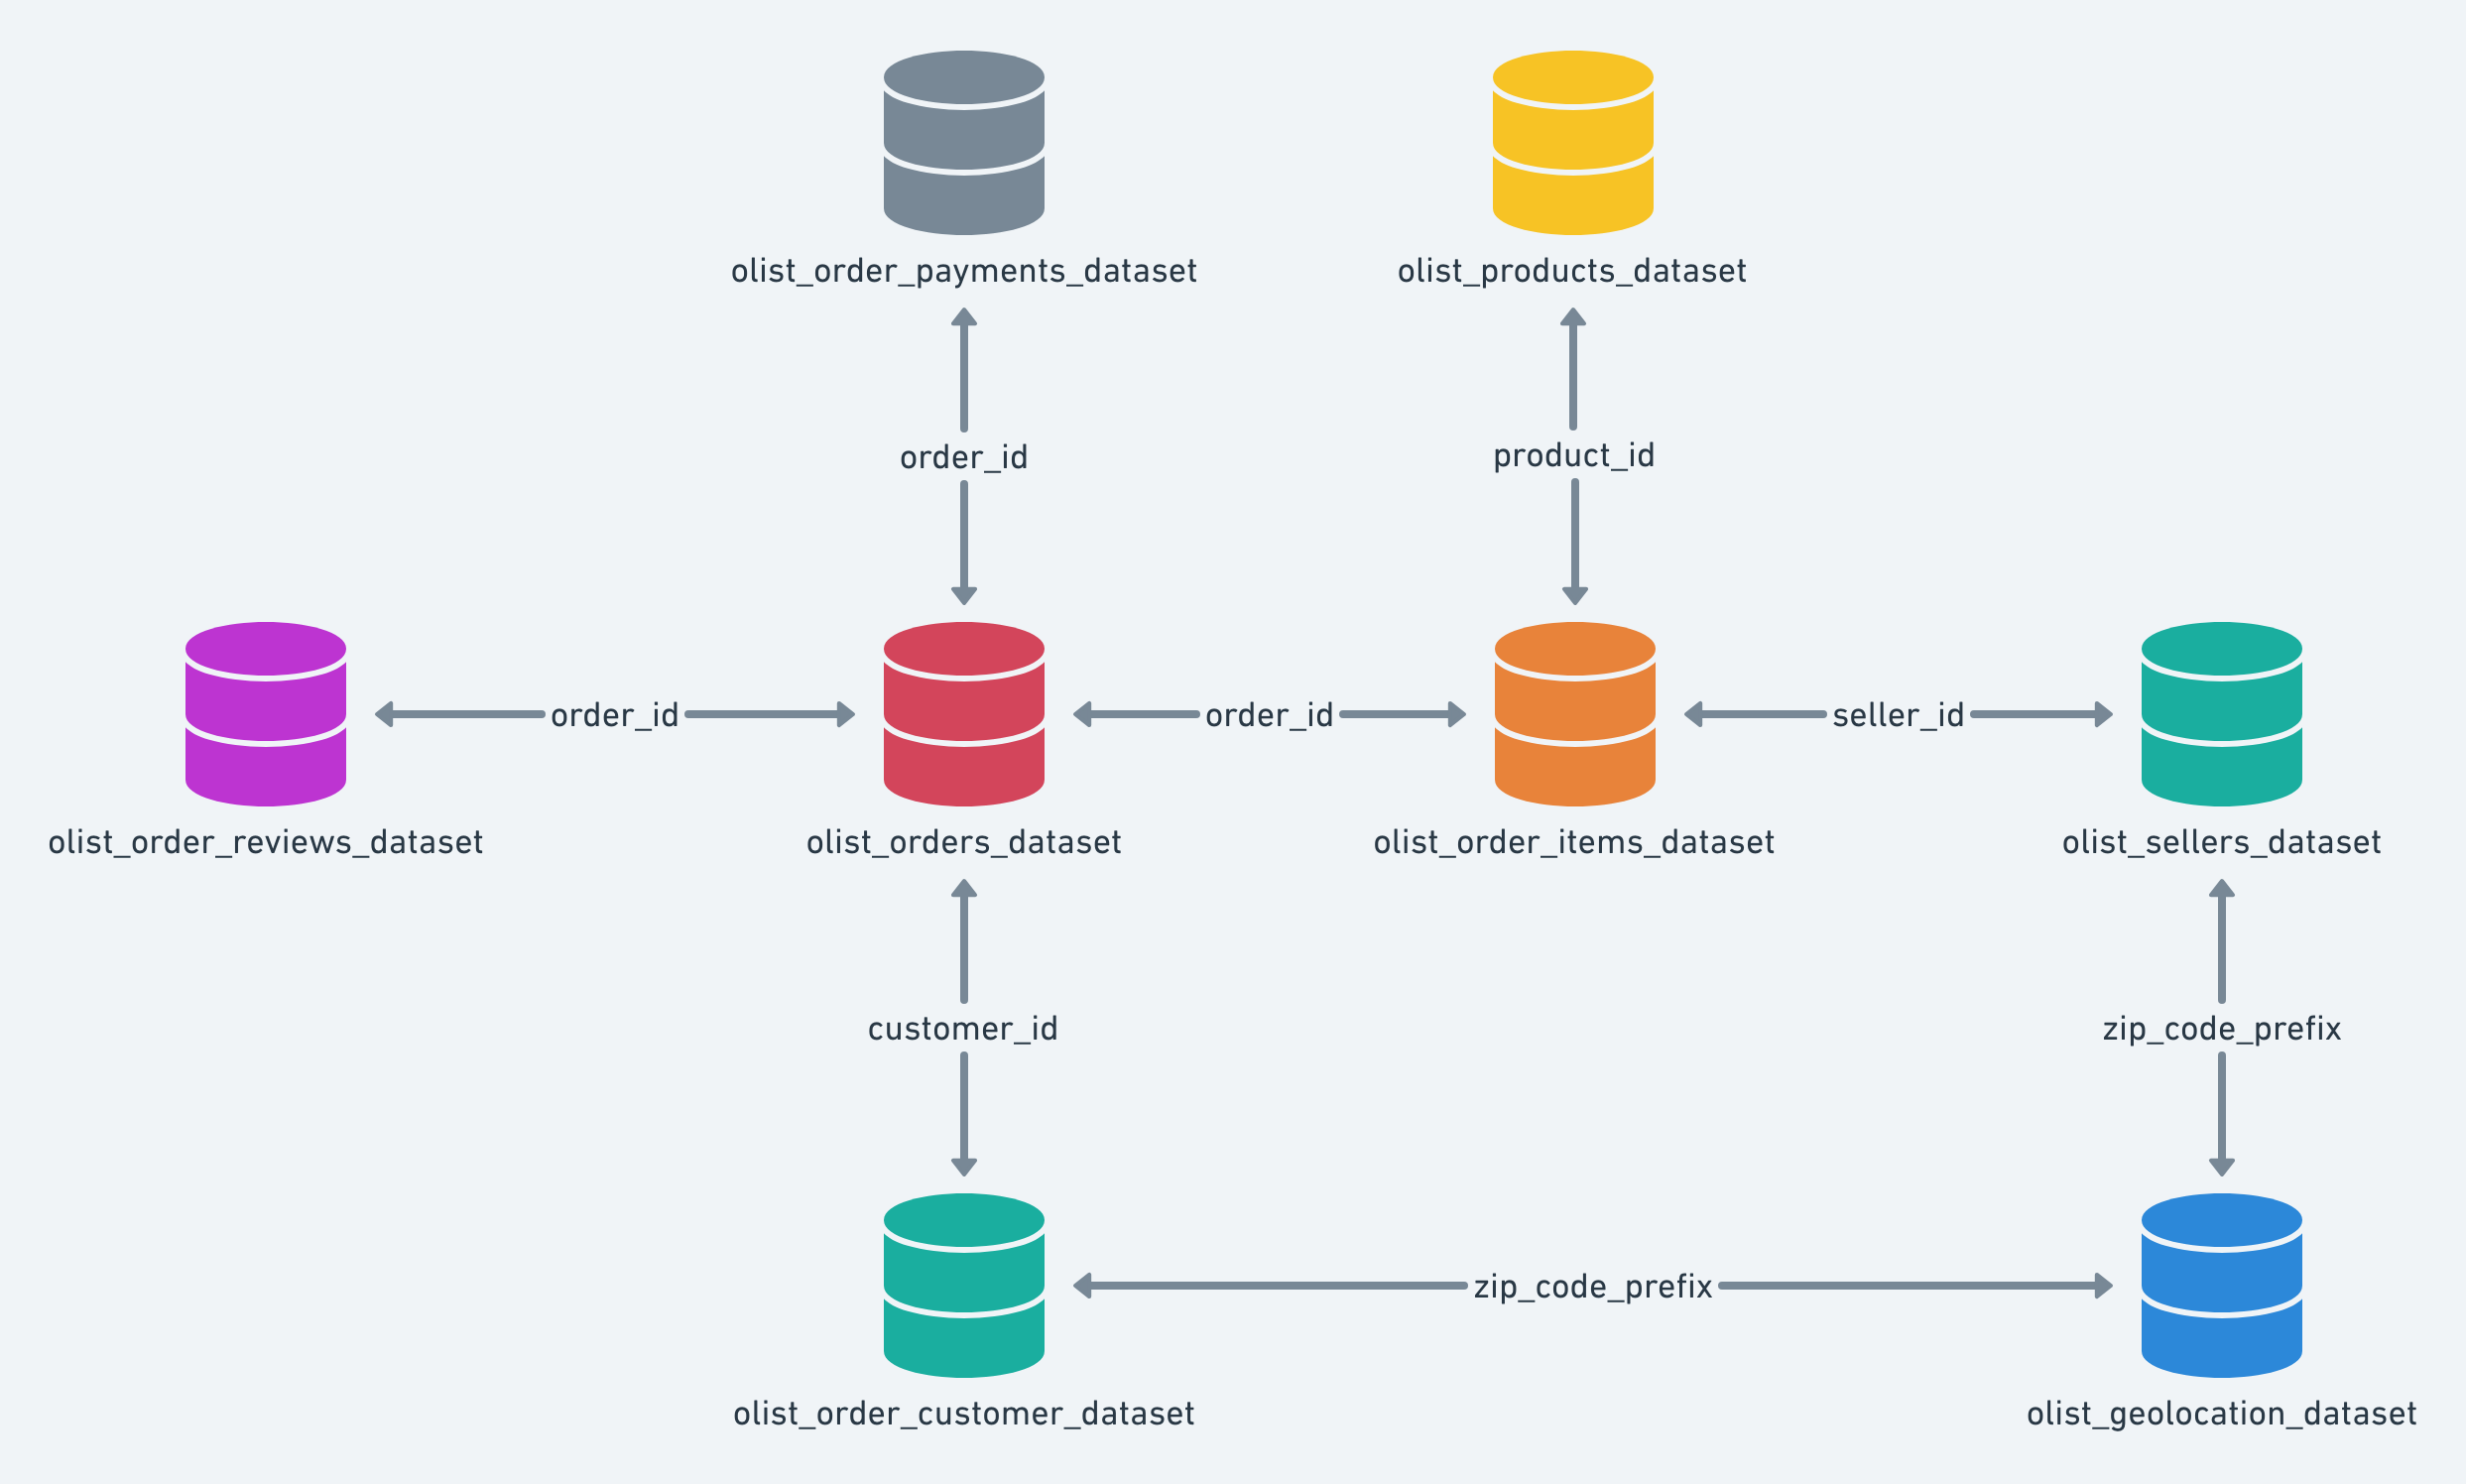

**Load the Dataset**

In [4]:
folder_path = "/content/drive/MyDrive/Power BI/Projects/Brazilian E-Commerce Public Dataset by Olist/Dataset"

In [5]:
customers = pd.read_csv(folder_path + '/' + 'olist_customers_dataset.csv')

In [6]:
geolocation = pd.read_csv(folder_path + '/' + 'olist_geolocation_dataset.csv')

In [7]:
order_items = pd.read_csv(folder_path + '/' + 'olist_order_items_dataset.csv')

In [8]:
order_payments =pd.read_csv(folder_path + '/' + 'olist_order_payments_dataset.csv')

In [9]:
order_reviews = pd.read_csv(folder_path + '/' + 'olist_order_reviews_dataset.csv')

In [10]:
orders = pd.read_csv(folder_path + '/' + 'olist_orders_dataset.csv')

In [11]:
products = pd.read_csv(folder_path + '/' + 'olist_products_dataset.csv')

In [12]:
sellers = pd.read_csv(folder_path + '/' + 'olist_sellers_dataset.csv')

In [13]:
product_category = pd.read_csv(folder_path + '/' +'product_category_name_translation.csv')


# **Customers**

In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


- The customers dataset has customer details with id and address details.The customer_unique_id is the identifier key for the customers.

In [16]:
customers.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


- There are no missing values

In [17]:
customers.duplicated().sum()

np.int64(0)

- There are no duplicate rows

In [18]:
#check for unique values
customers.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


- We can calculate the repeating customers,with the customer_unique_id.

In [19]:
customers['Repeating_customer'] = customers.duplicated(subset='customer_unique_id').astype(int)

In [20]:
customers['Repeating_customer'].value_counts(ascending=True)

,count
Repeating_customer,
1,3345
0,96096


-There are 96096 new customers and 3345 repeating customers

-As the customers unique id has no scope for future analysis,we can drop this column

In [21]:
#drop the unnecessary columns
customers.drop(['customer_unique_id'], axis=1, inplace=True)

In [22]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
 4   Repeating_customer        99441 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


Text(0, 0.5, 'No. of Customers')

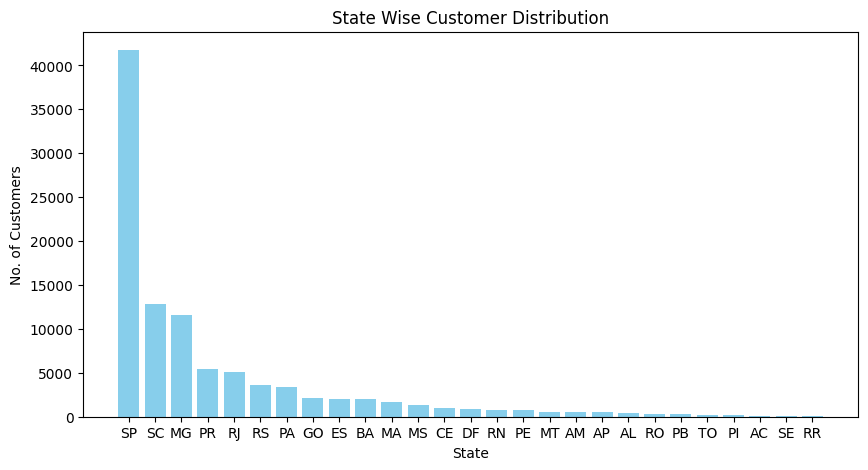

In [23]:
plt.figure(figsize=(10,5))
plt.bar(customers['customer_state'].unique(), customers['customer_state'].value_counts(),color ='skyblue')
plt.title('State Wise Customer Distribution')
plt.xlabel('State')
plt.ylabel('No. of Customers')

- The state 'SP' has the maximum no of customers followed by states 'SC' & 'RG' ranging around 12,000 customers

In [24]:
customers = customers.drop(['customer_city','customer_state'], axis=1)

# **Geolocation**



In [25]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


- The geolocation dataset has zipcode,lat ,long with other location details of Brazil which can be further used for analysis of other metrics

In [26]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [27]:
#check for null/missing values
geolocation.isnull().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


-There are no null values

# **Order-Items**

In [28]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [29]:
order_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [30]:
order_items.nunique()

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


In [31]:
#check for null values
order_items.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [32]:
#check for duplicate rows
order_items.duplicated().sum()

np.int64(0)

-There are no null or duplicate values in the order itmens dataframe

In [33]:
#drop the shipping limit date columns - it is the limit date for handling the order over to the logistic partner
#which deosnt help for further analysis
order_items = order_items.drop('shipping_limit_date', axis=1)

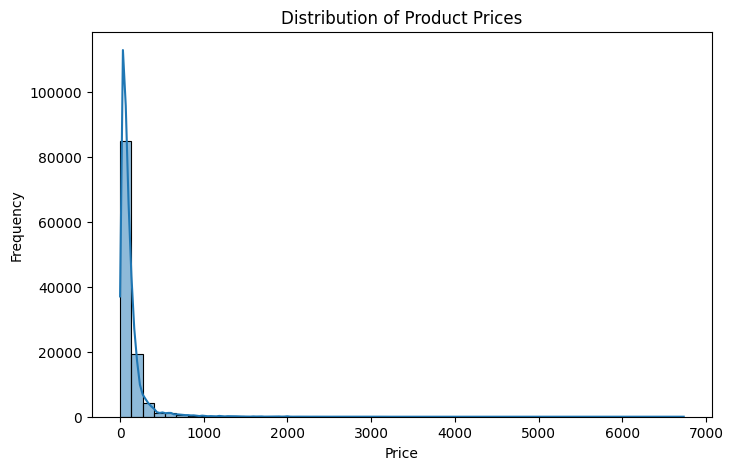

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(order_items['price'],bins = 50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

- Most of product price range betweeen 0 -200

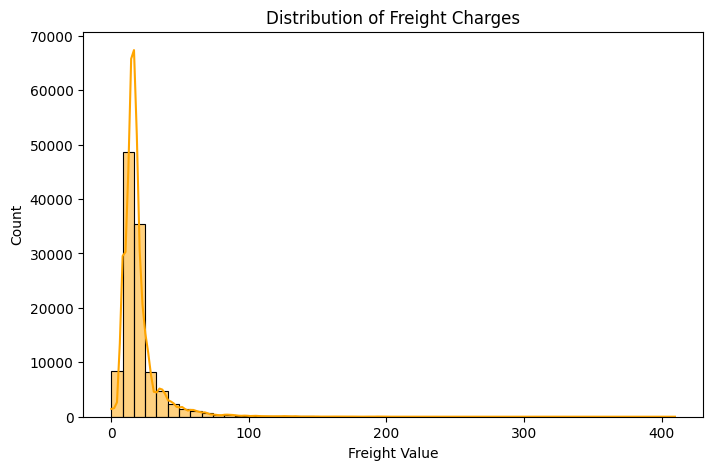

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(order_items['freight_value'], bins=50, kde=True, color='orange')
plt.title('Distribution of Freight Charges')
plt.xlabel('Freight Value')
plt.ylabel('Count')
plt.show()

- The freight value mostly ranges around 20-60

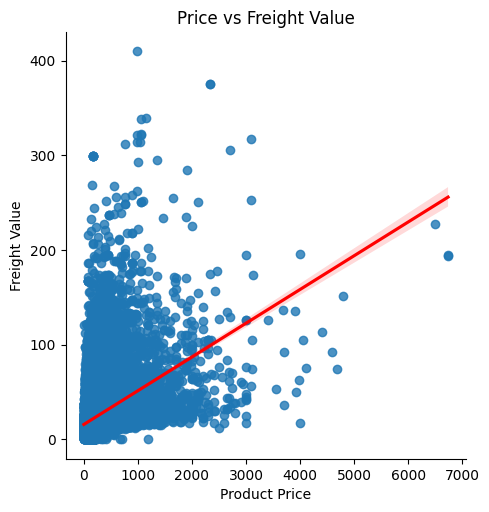

In [36]:
sns.lmplot(data=order_items, x='price', y='freight_value', line_kws={'color':'red'})
plt.title('Price vs Freight Value')
plt.xlabel('Product Price')
plt.ylabel('Freight Value')
plt.show()

- Shows a general trend where higher product prices tend to correspond with higher freight values. However, there is significant variability, suggesting that other factors also heavily influence the freight cost.

### Number of items per order

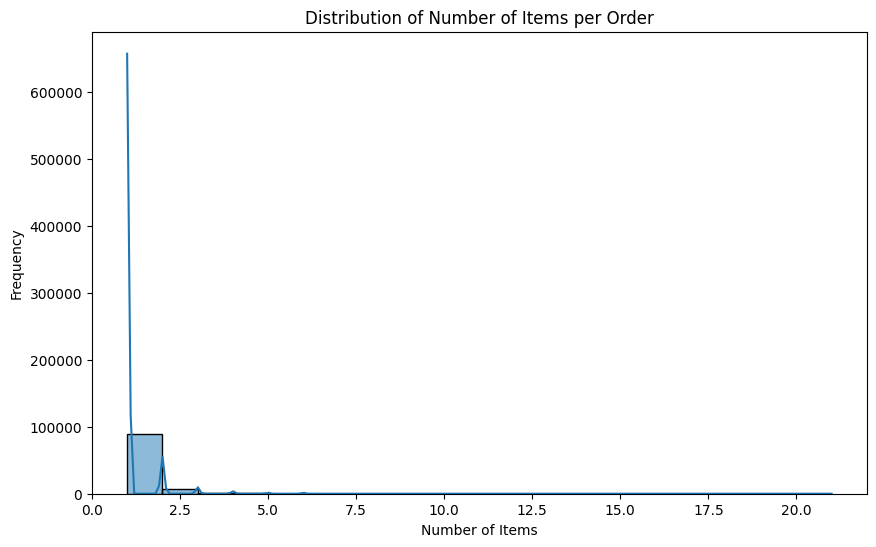

Summary statistics for items per order:
count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: order_item_id, dtype: float64


In [37]:
items_per_order = order_items.groupby('order_id')['order_item_id'].count()

plt.figure(figsize=(10, 6))
sns.histplot(items_per_order, bins=20, kde=True)
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

print("Summary statistics for items per order:")
print(items_per_order.describe())

- The analysis of items per order shows that the majority of orders contain only a single item. The mean and median number of items per order are both close to 1, and the 75th percentile is also 1, indicating this is a strong trend.

**Top 10 Sellers by Order Count**

/tmp/ipython-input-801814928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sellers.values, y=top_sellers.index, palette='viridis')


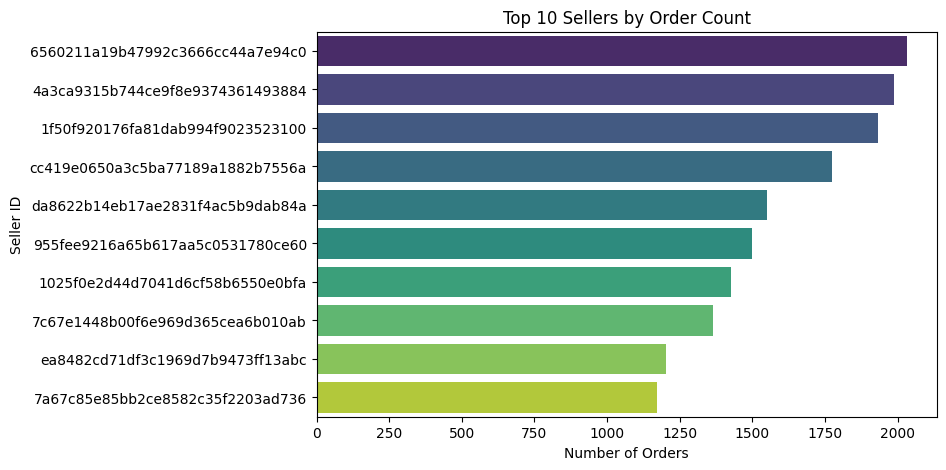

In [38]:
top_sellers = order_items['seller_id'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_sellers.values, y=top_sellers.index, palette='viridis')
plt.title('Top 10 Sellers by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Seller ID')
plt.show()


# **Order Payment**

In [39]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [40]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [41]:
#check for null values
order_payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [42]:
#check for duplicates
order_payments.duplicated().sum()

np.int64(0)

- There are no null values or duplicate

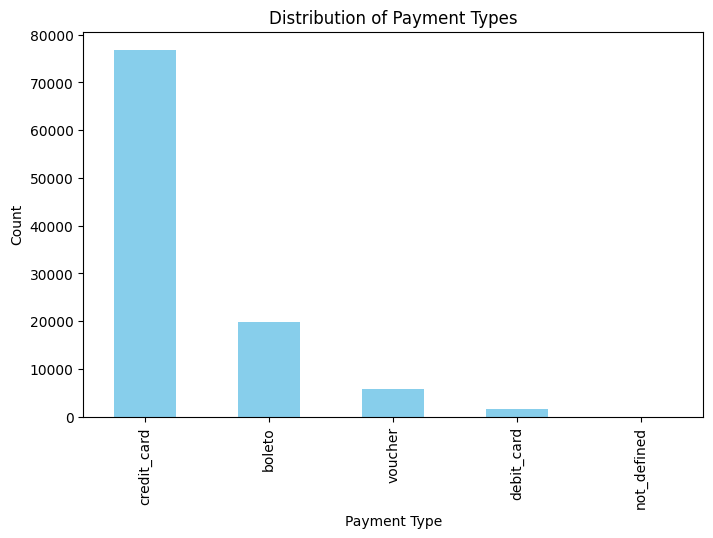

In [43]:
payment_type_count = order_payments['payment_type'].value_counts()

plt.figure(figsize=(8,5))
payment_type_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

- Most no of payments are done by credit_card

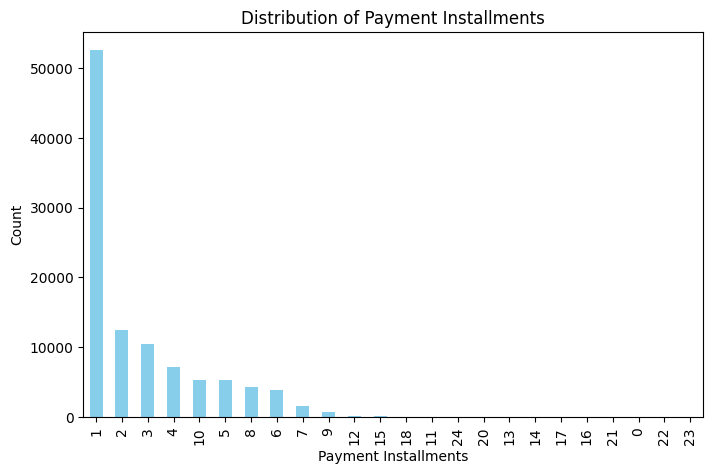

In [44]:
payments_installment_count = order_payments['payment_installments'].value_counts()

plt.figure(figsize=(8,5))
payments_installment_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Installments')
plt.xlabel('Payment Installments')
plt.ylabel('Count')
plt.show()


- The distribution of payment installments shows that the vast majority of payments are made with a single installment. The number of transactions decreases significantly as the number of installments increases.

/tmp/ipython-input-433468976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_payment.values, y=avg_payment.index, palette='coolwarm')


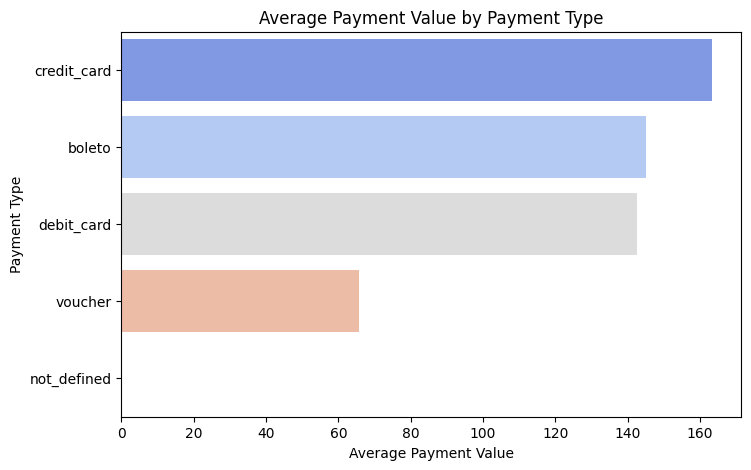

In [45]:
avg_payment = order_payments.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_payment.values, y=avg_payment.index, palette='coolwarm')
plt.title('Average Payment Value by Payment Type')
plt.xlabel('Average Payment Value')
plt.ylabel('Payment Type')
plt.show()


- The bar plot showing the average payment value by payment type indicates that credit cards have the highest average payment value, followed by boleto and debit card. Vouchers have the lowest average payment value. The 'not_defined' payment type has an average value of 0, which might require further investigation.

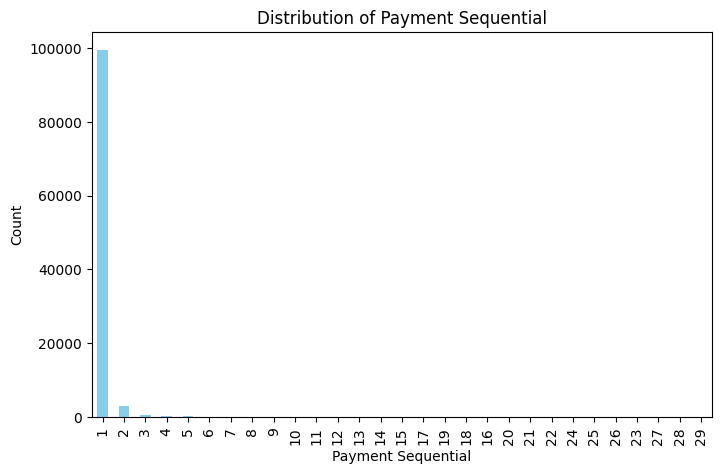

In [46]:
payment_sequential_count = order_payments['payment_sequential'].value_counts()

plt.figure(figsize=(8,5))
payment_sequential_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Sequential')
plt.xlabel('Payment Sequential')
plt.ylabel('Count')
plt.show()

### Relationship between Payment Installments and Payment Value

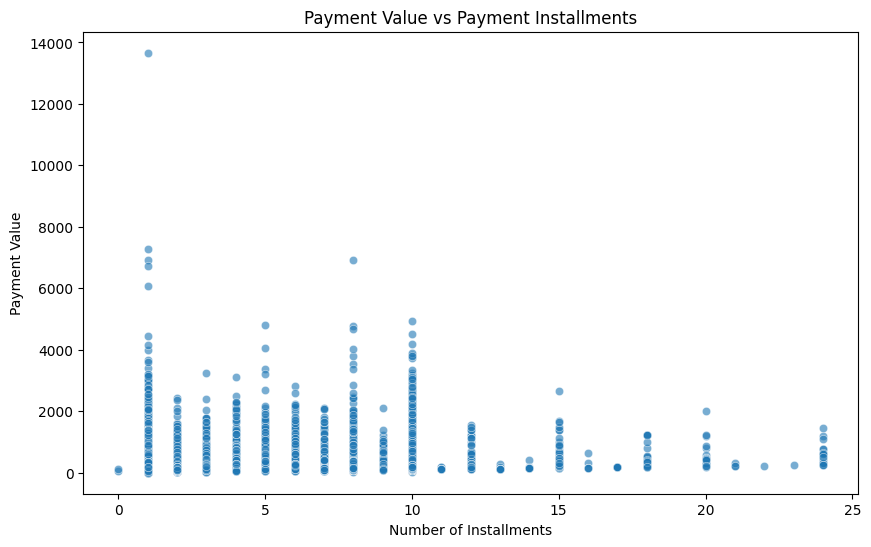

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='payment_installments', y='payment_value', data=order_payments, alpha=0.6)
plt.title('Payment Value vs Payment Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Payment Value')
plt.show()

- The scatter plot of Payment Value vs Payment Installments suggests a general trend where higher payment values are associated with a greater number of installments. However, there is a significant spread in the data, indicating that while more expensive orders might be paid over more installments, the payment value is not solely determined by the number of installments.

# **Order Reviews**

In [48]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [49]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [50]:
order_reviews.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [51]:
#print the null values percentage
missing_percent = order_reviews[['review_comment_title','review_comment_message']].isnull().mean() * 100
for col, perc in missing_percent.items():
    print(f"{col}: {perc:.2f}%")

review_comment_title: 88.34%
review_comment_message: 58.70%


In [52]:
order_reviews.nunique()

,0
review_id,98410
order_id,98673
review_score,5
review_comment_title,4527
review_comment_message,36159
review_creation_date,636
review_answer_timestamp,98248


- It is evident that there are duplicate reviews and order_id, as there are 99224 values in the dataset

In [53]:
print('Duplicates in review_id',order_reviews['review_id'].duplicated().sum())
print('Duplicates in order_id',order_reviews['order_id'].duplicated().sum())

Duplicates in review_id 814
Duplicates in order_id 551


- we can retain the most recent reviews for the orders and drop the reviews with same review_id for the particular order id

In [54]:
order_reviews = order_reviews.sort_values('review_creation_date').drop_duplicates('order_id', keep='last')

In [55]:
order_reviews = order_reviews.drop_duplicates('review_id')

In [56]:
print('Duplicates in review_id',order_reviews['review_id'].duplicated().sum())
print('Duplicates in order_id',order_reviews['order_id'].duplicated().sum())

Duplicates in review_id 0
Duplicates in order_id 0


In [57]:
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['Review_answer_Delaydays'] = (
    order_reviews['review_answer_timestamp'] - order_reviews['review_creation_date']
).dt.days

In [58]:
#drop the columns
order_reviews = order_reviews.drop(['review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'],axis = 1)

In [59]:
order_reviews.head()

,order_id,review_score,Review_answer_Delaydays
70906,809a282bbd5dbcabb6f2f724fca862ec,1,24
37547,bfbd0f9bdef84302105ad712db648a6c,1,1
5503,e5215415bb6f76fe3b7cb68103a0d1c0,1,2
60439,e2144124f98f3bf46939bc5183104041,4,1
41042,9aa3197e4887919fde0307fc23601d7a,4,2


**Distribution of Review Scores**

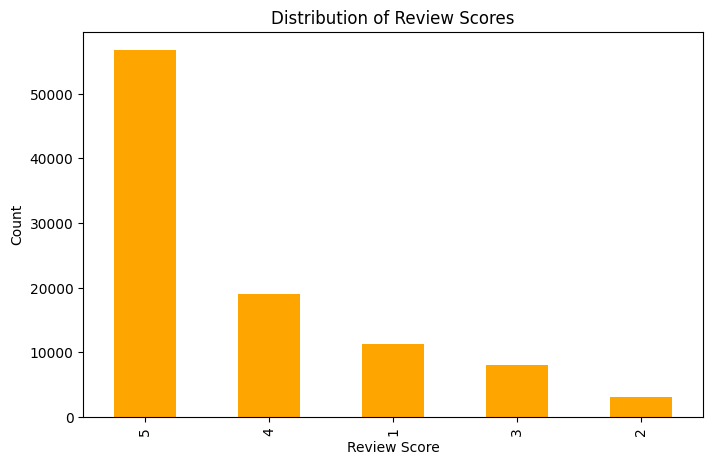

In [60]:
review_score_count = order_reviews['review_score'].value_counts()
plt.figure(figsize=(8,5))
review_score_count.plot(kind='bar', color='orange')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

- The distribution of review scores shows that the majority of orders receive high ratings (4 or 5 stars), indicating a generally positive customer experience. However, there is also a notable number of 1-star reviews, suggesting there are also instances of poor experiences.

# **Orders**

In [61]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [62]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [63]:
#print the null values percentage
missing_percent = orders.isnull().mean() * 100
for col, perc in missing_percent.items():
    print(f"{col}: {perc:.2f}%")

order_id: 0.00%
customer_id: 0.00%
order_status: 0.00%
order_purchase_timestamp: 0.00%
order_approved_at: 0.16%
order_delivered_carrier_date: 1.79%
order_delivered_customer_date: 2.98%
order_estimated_delivery_date: 0.00%


In [64]:
orders.duplicated().sum()

np.int64(0)

In [65]:
#Convert to DateTime Format
date_cols = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')


In [66]:
orders['delivery_time_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
orders['estimated_time_days'] = (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']).dt.days
orders['delay_vs_estimate'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days


create a new year 'order_year' which helps in further analysis / find the no of orders in aparticular year

In [67]:
orders['order_year'] = orders['order_purchase_timestamp'].dt.year
orders['order_month'] = orders['order_purchase_timestamp'].dt.strftime('%b')

In [68]:
orders = orders.drop(['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],axis = 1)

In [69]:
orders['order_purchase_timestamp'] = orders['order_purchase_timestamp'].dt.date

In [70]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,delivery_time_days,estimated_time_days,delay_vs_estimate,order_year,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,8.0,15,-8.0,2017,Oct
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,13.0,19,-6.0,2018,Jul
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,9.0,26,-18.0,2018,Aug
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,13.0,26,-13.0,2017,Nov
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2.0,12,-10.0,2018,Feb


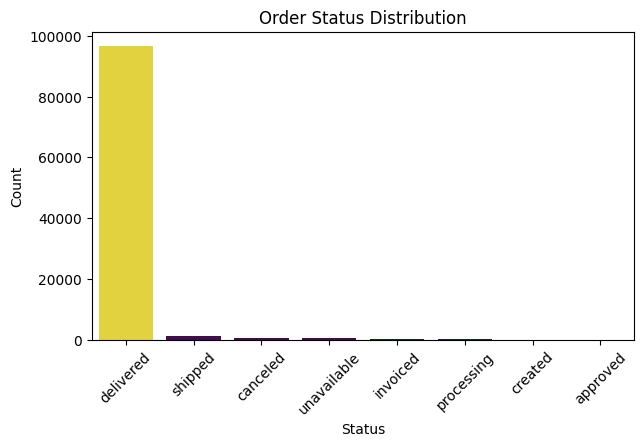

In [71]:
status_counts = orders['order_status'].value_counts()

plt.figure(figsize=(7,4))
sns.barplot(x=status_counts.index, y=status_counts.values,hue = status_counts,legend = False,   palette='viridis')

plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


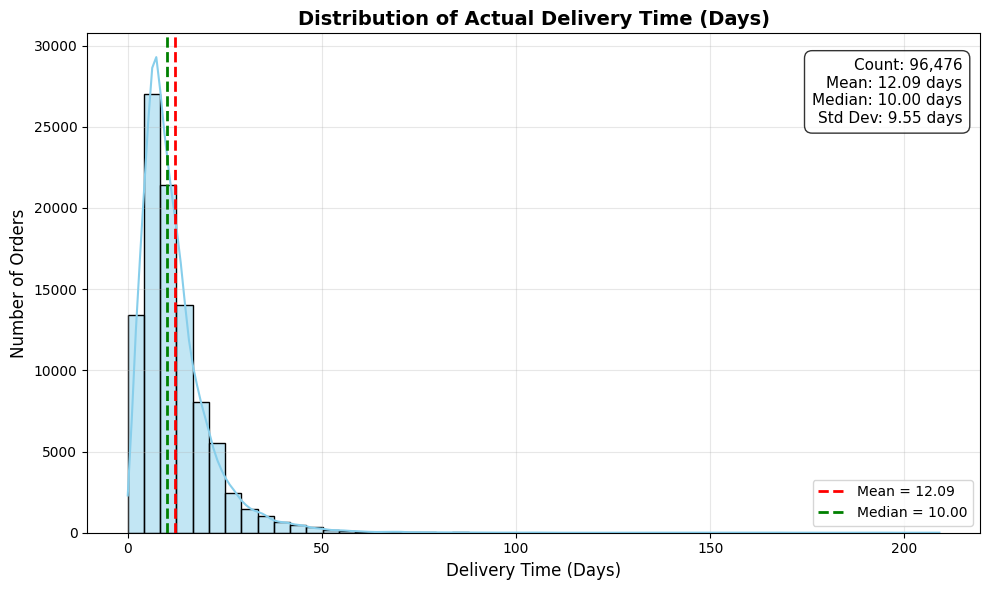

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute summary statistics
mean_val = orders['delivery_time_days'].mean()
median_val = orders['delivery_time_days'].median()
std_val = orders['delivery_time_days'].std()
count_val = orders['delivery_time_days'].count()

# Create the histogram
plt.figure(figsize=(10,6))
sns.histplot(orders['delivery_time_days'], bins=50, kde=True, color='skyblue')

# Add mean and median lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median = {median_val:.2f}')

# Add metrics text box
textstr = (
    f'Count: {count_val:,}\n'
    f'Mean: {mean_val:.2f} days\n'
    f'Median: {median_val:.2f} days\n'
    f'Std Dev: {std_val:.2f} days'
)

# Positioning the text box
props = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8)
plt.text(
    0.98, 0.95, textstr,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=props
)

# Final chart formatting
plt.title('Distribution of Actual Delivery Time (Days)', fontsize=14, fontweight='bold')
plt.xlabel('Delivery Time (Days)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


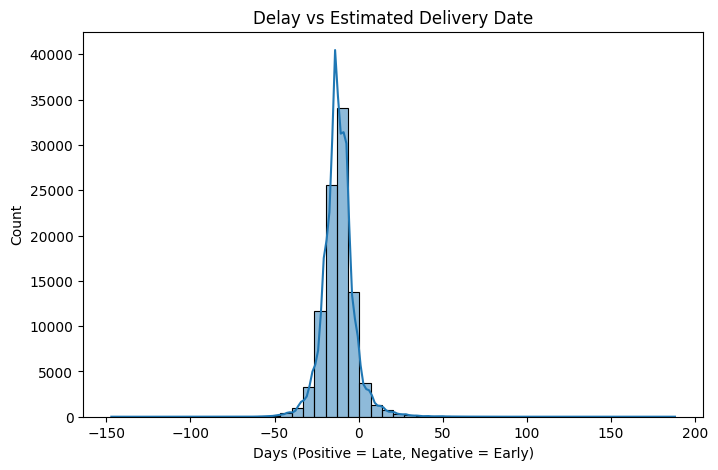

In [73]:
#Delay vs Estimated Delivery Date
plt.figure(figsize=(8,5))
sns.histplot(orders['delay_vs_estimate'], bins=50, kde=True)
plt.title('Delay vs Estimated Delivery Date')
plt.xlabel('Days (Positive = Late, Negative = Early)')
plt.show()

# **Products**

In [74]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [75]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [76]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [77]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


- Merge the product and product_category table and drop the porduct_category_name and retain the english name

In [78]:
products = products.merge(product_category, on='product_category_name', how='left')

In [79]:
products = products.drop('product_category_name', axis=1)

In [80]:
#print the null values percentage
missing_percent = products.isnull().mean() * 100
for col, perc in missing_percent.items():
    print(f"{col}: {perc:.2f}%")

product_id: 0.00%
product_name_lenght: 1.85%
product_description_lenght: 1.85%
product_photos_qty: 1.85%
product_weight_g: 0.01%
product_length_cm: 0.01%
product_height_cm: 0.01%
product_width_cm: 0.01%
product_category_name_english: 1.89%


In [81]:
products['product_category_name_english'] = products['product_category_name_english'].fillna('Not_available')


In [82]:
products.duplicated().sum()

np.int64(0)

/tmp/ipython-input-2591277457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cats.values, y=top_cats.index, palette='viridis')


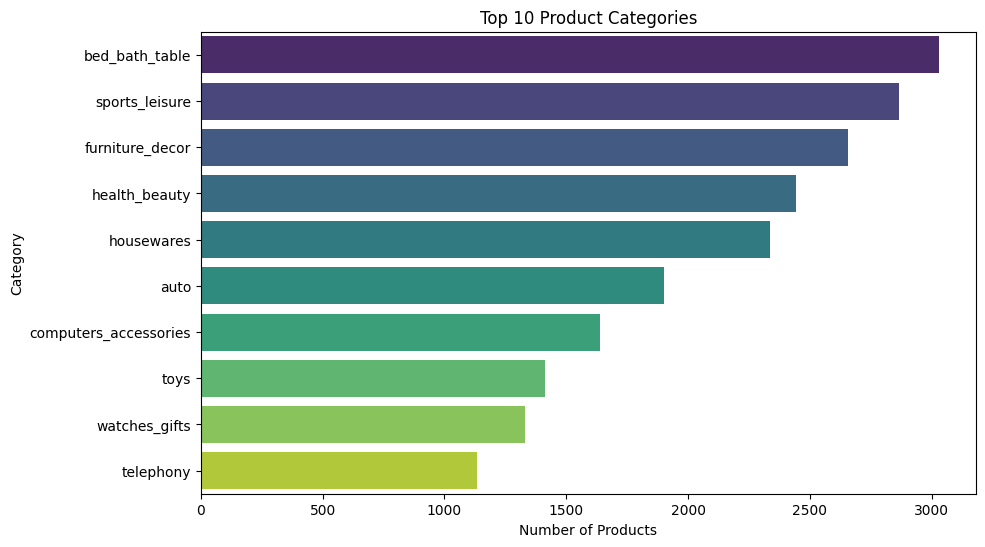

In [83]:
plt.figure(figsize=(10,6))
top_cats = products['product_category_name_english'].value_counts().head(10)
sns.barplot(x=top_cats.values, y=top_cats.index, palette='viridis')
plt.title('Top 10 Product Categories')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()


# **Sellers**

In [84]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [85]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [86]:
#print the null values percentage
missing_percent = sellers.isnull().mean() * 100
for col, perc in missing_percent.items():
    print(f"{col}: {perc:.2f}%")

seller_id: 0.00%
seller_zip_code_prefix: 0.00%
seller_city: 0.00%
seller_state: 0.00%


- No missing values

In [87]:
sellers = sellers.drop(['seller_city','seller_state'], axis=1)

**Gelocation for Customers & Sellers**

In [88]:
geo_customers = geolocation.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
                                            'gelolocation_lat':'customer_lat','geolocation_lng':'customer_lng',
                                            'geolocation_state':'customer_state'})

In [89]:
geo_sellers = geolocation.rename(columns={'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
                                            'gelolocation_lat':'seller_lat','geolocation_lng':'seller_lng',
                                            'geolocation_state':'seller_state'})

**Merge the datasets**

In [90]:
df = pd.merge(orders,order_payments, on='order_id', how='left',sort=False)

In [91]:
df = df.merge(order_reviews, on='order_id', how='left',sort=False)

In [92]:
df = df.merge(customers, on='customer_id', how='left',sort=False)

In [93]:
df = df.merge(order_items, on='order_id', how='left',sort=False)

In [94]:
df = df.merge(products, on='product_id', how='left',sort=False)

In [95]:
df = df.merge(sellers, on='seller_id', how='left',sort=False)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   delivery_time_days             115037 non-null  float64
 5   estimated_time_days            118434 non-null  int64  
 6   delay_vs_estimate              115037 non-null  float64
 7   order_year                     118434 non-null  int32  
 8   order_month                    118434 non-null  object 
 9   payment_sequential             118431 non-null  float64
 10  payment_type                   118431 non-null  object 
 11  payment_installments           118431 non-null  float64
 12  payment_value                 

Save the merged datframe to csv file for furtherAnalysis

In [99]:
df.to_csv(folder_path + '/' + "Merged_df.csv", index=False)
print("CSV file saved successfully!")

CSV file saved successfully!
